In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import  SMOTE

In [2]:
cc = pd.read_csv('/home/tati/code/t/24-project-class-imbalance/data/creditcard.csv')
cc.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Analisando Variável Targert

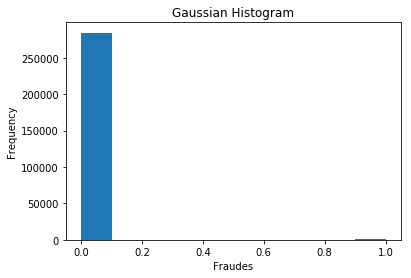

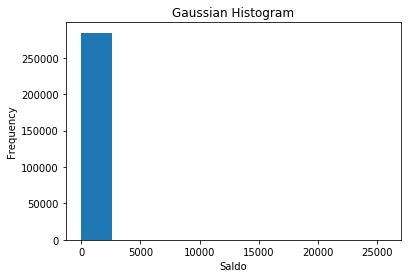

In [3]:
Y=cc['Class']
Saldo=cc['Amount']
plt.hist(Y)
plt.title("Gaussian Histogram")
plt.xlabel("Fraudes")
plt.ylabel("Frequency")
plt.show()

plt.hist(Saldo)
plt.title("Gaussian Histogram")
plt.xlabel("Saldo")
plt.ylabel("Frequency")
plt.show()

Estimando KNN e Regressão Logística 

In [5]:
y=cc["Class"]
X=cc.drop(["Class"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
#knn.score(X_train, y_train)
#knn.score(X_test, y_test)
y_predict=knn.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[85295     0]
 [  148     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.00      0.00      0.00       148

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



/home/tati/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/tati/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/tati/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [6]:
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
y_logitpred=logreg.predict(X_test)
#print(y_logitpred)
print(confusion_matrix(y_test,y_logitpred))
print(classification_report(y_test,y_logitpred))
y_probreglog=logreg.predict_proba(X_test)[:,1]
#print(y_probreglog)

/home/tati/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[85261    34]
 [   52    96]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.74      0.65      0.69       148

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.87      0.82      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_probreglog)
#Grafico da curva ROC REGLOG
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,  tpr, label='Regressão Logística')
plt.title("Curva ROC Regressão Logística")
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.show()

In [ ]:
#Grafico da curva ROC KNN
y_probknn=knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_probknn)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,  tpr, label='KNN')
plt.title("Curva ROC KNN")
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.show()

Balanceamento Simples

In [9]:
Maus=cc[cc["Class"] >0]
Maus.head()
Bons=cc[cc["Class"] <1]
Bons.head()

print(Bons.shape)
print(Maus.shape)

Bons_random=Bons.sample(492, replace=False)
print(Bons_random.shape)

(284315, 31)
(492, 31)
(492, 31)


Empilhando as Bases

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score

In [11]:
ABT=Maus.append(Bons_random)
ABT.head()
print(ABT.shape)

(984, 31)


[[393  99]
 [186 306]]
             precision    recall  f1-score   support

          0       0.68      0.80      0.73       492
          1       0.76      0.62      0.68       492

avg / total       0.72      0.71      0.71       984

[[483   9]
 [ 40 452]]
             precision    recall  f1-score   support

          0       0.92      0.98      0.95       492
          1       0.98      0.92      0.95       492

avg / total       0.95      0.95      0.95       984



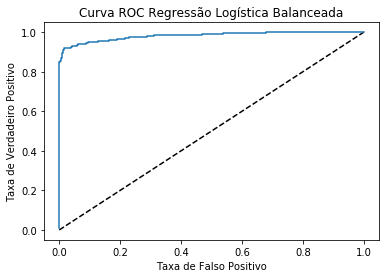

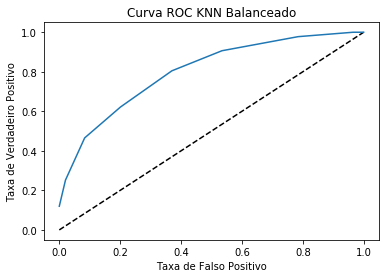

In [12]:
X_ABT=ABT.drop(["Class"],axis=1)
Y_ABT=ABT["Class"]
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_ABT, Y_ABT)
yabt_predict=knn.predict(X_ABT)
print(confusion_matrix(Y_ABT,yabt_predict))
print(classification_report(Y_ABT,yabt_predict))
logreg=LogisticRegression()
logreg.fit(X_ABT, Y_ABT)
y_abtpred=logreg.predict(X_ABT)
#print(y_logitpred)
print(confusion_matrix(Y_ABT,y_abtpred))
print(classification_report(Y_ABT,y_abtpred))
y_probreglog_ABT=logreg.predict_proba(X_ABT)[:,1]
#print(y_probreglog)
fpr, tpr, thresholds = roc_curve(Y_ABT,y_probreglog_ABT)
#Grafico da curva ROC REGLOG
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,  tpr, label='Regressão Logística Balanceada')
plt.title("Curva ROC Regressão Logística Balanceada")
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.show()
#Grafico da curva ROC KNN
y_probknn_abt=knn.predict_proba(X_ABT)[:,1]
fpr, tpr, thresholds = roc_curve(Y_ABT,y_probknn_abt)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,  tpr, label='KNN Balanceado')
plt.title("Curva ROC KNN Balanceado")
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.show()


In [25]:
rforest = RandomForestClassifier()
rforest.fit(X_ABT, Y_ABT)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

[[492   0]
 [ 58 434]]
             precision    recall  f1-score   support

          0       0.89      1.00      0.94       492
          1       1.00      0.88      0.94       492

avg / total       0.95      0.94      0.94       984



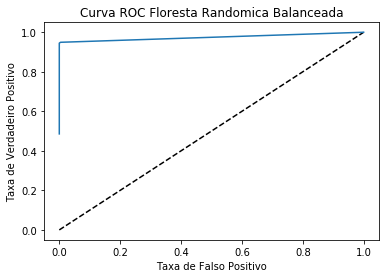

In [33]:
y_rforest=rforest.predict(X_ABT)
#print(y_logitpred)
print(confusion_matrix(Y_ABT,y_rforest))
print(classification_report(Y_ABT,y_rforest))
y_probrforest_ABT=rforest.predict_proba(X_ABT)[:,1]
#print(y_probreglog)
fpr, tpr, thresholds = roc_curve(Y_ABT,y_probrforest_ABT)
#Grafico da curva ROC Random forest
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,  tpr, label='Floresta Randomica Balanceada')
plt.title("Curva ROC Floresta Randomica Balanceada")
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.show()

Utilizando R forest em amostra real

In [28]:
y=cc["Class"]
X=cc.drop(["Class"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

[[85289     6]
 [   36   112]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85295
          1       0.95      0.76      0.84       148

avg / total       1.00      1.00      1.00     85443



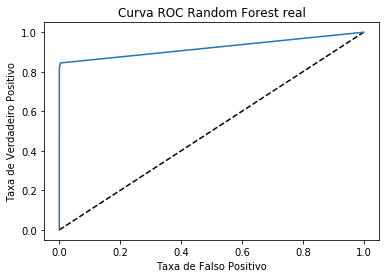

In [35]:
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
y_rforest_real=rforest.predict(X_test)

#print(y_logitpred)
print(confusion_matrix(y_test,y_rforest_real))
print(classification_report(y_test,y_rforest_real))
y_probrforest_ABT_real=rforest.predict_proba(X_test)[:,1]
#print(y_probreglog)
fpr, tpr, thresholds = roc_curve(y_test,y_probrforest_ABT_real)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,  tpr, label='Random Forest real')
plt.title("Curva ROC Random Forest real")
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.show()

[[85291     4]
 [   48   100]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85295
          1       0.96      0.68      0.79       148

avg / total       1.00      1.00      1.00     85443



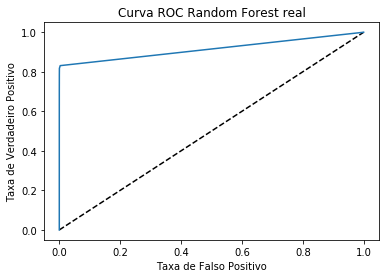

In [36]:
rforest = RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

rforest.fit(X_train, y_train)
y_rforest_real=rforest.predict(X_test)

#print(y_logitpred)
print(confusion_matrix(y_test,y_rforest_real))
print(classification_report(y_test,y_rforest_real))
y_probrforest_ABT_real=rforest.predict_proba(X_test)[:,1]
#print(y_probreglog)
fpr, tpr, thresholds = roc_curve(y_test,y_probrforest_ABT_real)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,  tpr, label='Random Forest real')
plt.title("Curva ROC Random Forest real")
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.show()

In [47]:
Teste= np.random.poisson(1,2)
print(Teste)

[0 0]


Anomalias - Intuitivo


In [63]:
cc_outlier=cc.copy()
cc_outlier["Amount"]=(cc_outlier["Amount"] -cc_outlier["Amount"].mean())/ cc_outlier["Amount"].std()
cc_outlier["Y_pred_anom"] = np.where(np.abs(cc_outlier['Amount']) > 3, 1, 0)



outliers_amount=cc_outlier[cc_outlier["Y_pred_anom"] <=0]
normal_amount=cc_outlier[cc_outlier["Y_pred_anom"] > 0]





print(outliers_amount.shape)
print(normal_amount.shape)
cc_summed = cc_outlier.groupby(['Y_pred_anom'])['Class'].sum()
cc_summed.head()



(280731, 32)
(4076, 32)


Y_pred_anom
0    481
1     11
Name: Class, dtype: int64

In [67]:
11/4076

0.0026987242394504417

In [66]:
481/280731

0.0017133839868058746